# Bioimage Model Zoo and BioImageArchive integration example notebook

This notebook shows how to benchmark models from the [BioImage Model Zoo](https://bioimage.io) using reference datasets from the [BioImage Archive](https://www.ebi.ac.uk/bioimage-archive/)

### 1. Import necessary dependencies

In [24]:
from bia_bmz_integration import bulk_process

### 2. Input BMZ models to benchmark

Let's look at the performance of [loyal squid](https://bioimage.io/#/?tags=loyal-squid&id=10.5281%2Fzenodo.6383429) and [noisy fish](https://bioimage.io/#/?id=10.5281%2Fzenodo.7772662&type=model&tags=noisy-fish) to segment cell nuclei in 3D.

In [25]:
models = [
    "loyal-squid",
    "noisy-fish",
]

### 3. Input reference image and annotation from the BIA

We will test their performance on [S-BIAD1026](https://www.ebi.ac.uk/biostudies/bioimages/studies/S-BIAD1026). A dataset that contains annotated 3D images of Arabidopsis Ovules. 

In [26]:
datasets = {
    "BIAD1026": (
        "https://uk1s3.embassy.ebi.ac.uk/bia-zarr-test/1135_n_H2BtdTomato.ome.zarr/0",
        "https://uk1s3.embassy.ebi.ac.uk/bia-zarr-test/1135_n_stain_StarDist_goldGT_180_rotation.ome.zarr/0",
    )
}

### 4. Run benchmarking

We are going to run the models only on a few z planes to speed things up. 

2024-10-17 11:19:04.759 | INFO     | bioimageio.spec._internal.io_utils:open_bioimageio_yaml:112 - loading loyal-squid from https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/loyal-squid/1/files/rdf.yaml


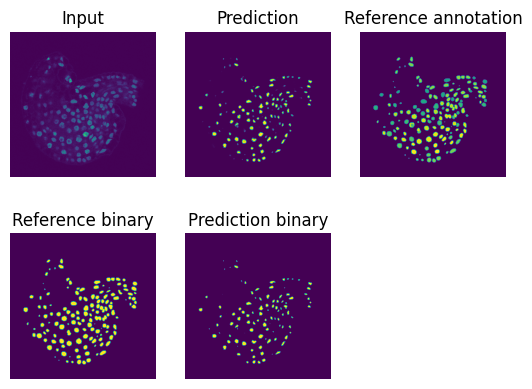

2024-10-17 11:19:20.913 | INFO     | bioimageio.spec._internal.io_utils:open_bioimageio_yaml:112 - loading noisy-fish from https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/noisy-fish/1/files/rdf.yaml


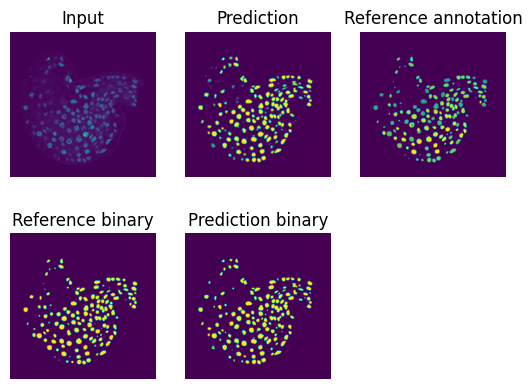

In [27]:
scores = bulk_process(models, datasets, z_planes=[170, 178])

### 5. Display benchmarking metrics

Here we can have a look at the benchmarking scores. The relevant metrics for segmentation are: precision, recall, IoU and Dice. The scores vary from 0 to 1, with 1 denoting the most similarity between the model's prediction and the reference annotation.

In [28]:
display(scores)

Dataset BIAD1026
Model              Score                      
Model: loyal-squid Precision          0.999000
                   Recall             0.346000
                   IoU                0.345634
                   Dice               0.513712
                   PSNR              12.793850
                   RMSE             262.490051
                   SSIM               0.875026
Model: noisy-fish  Precision          0.870000
                   Recall             0.831000
                   IoU                0.739073
                   Dice               0.849962
                   PSNR              12.797844
                   RMSE             262.369568
                   SSIM               0.875068